In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


# Factors Affecting Student Performance

## Introduction

This notebook explores and analyzes various factors that influence student exam performance. Using a dataset containing variables such as attendance, parental involvement, teacher quality, study habits, and socioeconomic conditions, the analysis investigates which elements have the most significant impact on student scores.



## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
data = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Data Understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Identifying Missing Values

In [5]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [7]:
## CATEGORICAL COLUMNS

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

### Handling Missing Values

In [8]:
## FILLING MISSING VALUES WITH MODE

for column in categorical_columns:
    data[column].fillna(data[column].mode()[0],inplace = True)

/tmp/ipykernel_17/3341038612.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0],inplace = True)


In [9]:
data.isnull().sum()  ## No NULL values 

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Removing duplicates

In [10]:
data.drop_duplicates() ## 

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


__No Duplicates were found.__

### Summary

In [11]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [12]:
## Find rows where 'Exam Score' is greater than 100

invalid_score = data[data['Exam_Score'] > 100]
invalid_score

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


__we have found one row with an exam score of 101 which is likely an error, as the maximum possible score is usually 100.__

In [13]:
## We dont know the actual score so we will remove this row

data = data[data['Exam_Score'] <= 100]
data.reset_index(drop = True)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6602,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6603,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6604,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


### Handle Inconsistent Data

In [14]:
# Check unique values in categorical columns

for col in categorical_columns:
    print(col)
    print(data[col].unique())
    print(       )

Parental_Involvement
['Low' 'Medium' 'High']

Access_to_Resources
['High' 'Medium' 'Low']

Extracurricular_Activities
['No' 'Yes']

Motivation_Level
['Low' 'Medium' 'High']

Internet_Access
['Yes' 'No']

Family_Income
['Low' 'Medium' 'High']

Teacher_Quality
['Medium' 'High' 'Low']

School_Type
['Public' 'Private']

Peer_Influence
['Positive' 'Negative' 'Neutral']

Learning_Disabilities
['No' 'Yes']

Parental_Education_Level
['High School' 'College' 'Postgraduate']

Distance_from_Home
['Near' 'Moderate' 'Far']

Gender
['Male' 'Female']



## Final Check

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6606 non-null   int64 
 1   Attendance                  6606 non-null   int64 
 2   Parental_Involvement        6606 non-null   object
 3   Access_to_Resources         6606 non-null   object
 4   Extracurricular_Activities  6606 non-null   object
 5   Sleep_Hours                 6606 non-null   int64 
 6   Previous_Scores             6606 non-null   int64 
 7   Motivation_Level            6606 non-null   object
 8   Internet_Access             6606 non-null   object
 9   Tutoring_Sessions           6606 non-null   int64 
 10  Family_Income               6606 non-null   object
 11  Teacher_Quality             6606 non-null   object
 12  School_Type                 6606 non-null   object
 13  Peer_Influence              6606 non-null   object
 1

## Categorical Columns

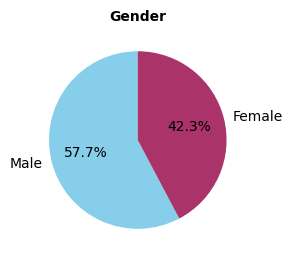

In [16]:
## Gender 

plt.figure(figsize = (3,3))

value = data['Gender'].value_counts()
wedges, texts, autotexts = plt.pie(value, labels = value.index, autopct = "%1.1f%%", startangle = 90,colors = ['#87CEEB','#AA336A'])
plt.title("Gender", fontsize = 10, weight = 'bold')

plt.tight_layout()
plt.show()

In [17]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

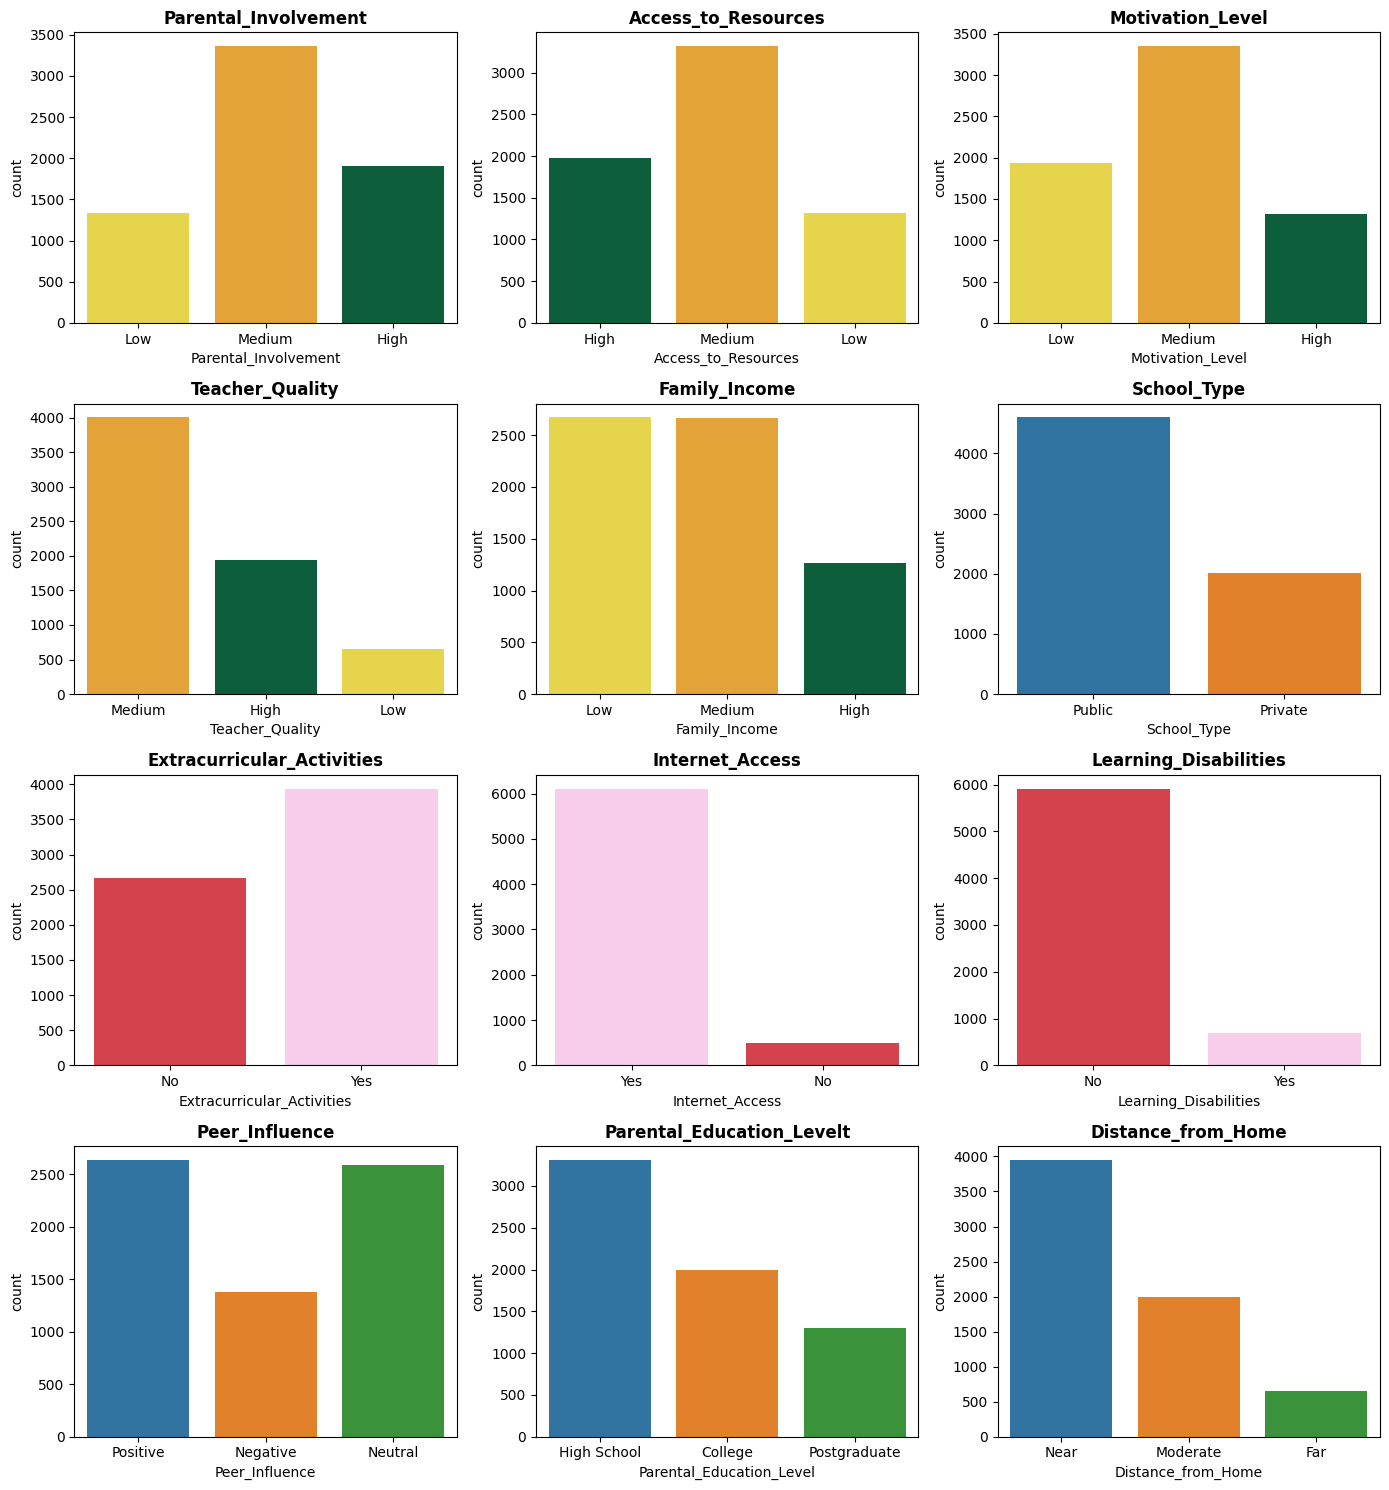

In [18]:
## Categorical Columns

plt.figure(figsize = (14,15))
palette = {'Low':'#ffe733',"Medium":"#FFAA1C","High":"#006b3e",'Yes':"#FFC6EE","No":"#ED2938"}

plt.subplot(4,3,1)
sns.countplot(data = data, x = "Parental_Involvement", palette = palette)
plt.title("Parental_Involvement", weight = 'bold')

plt.subplot(4,3,2)
sns.countplot(data = data, x = "Access_to_Resources", palette = palette)
plt.title("Access_to_Resources", weight = 'bold')

plt.subplot(4,3,3)
sns.countplot(data = data, x = "Motivation_Level", palette = palette)
plt.title("Motivation_Level", weight = 'bold')

plt.subplot(4,3,4)
sns.countplot(data = data, x = "Teacher_Quality", palette = palette)
plt.title("Teacher_Quality", weight = 'bold')

plt.subplot(4,3,5)
sns.countplot(data = data, x = "Family_Income", palette = palette)
plt.title("Family_Income", weight = 'bold')

plt.subplot(4,3,6)
sns.countplot(data = data, x = "School_Type")
plt.title("School_Type", weight = 'bold')

plt.subplot(4,3,7)
sns.countplot(data = data, x = "Extracurricular_Activities", palette = palette)
plt.title("Extracurricular_Activities", weight = 'bold')

plt.subplot(4,3,8)
sns.countplot(data = data, x = "Internet_Access", palette = palette)
plt.title("Internet_Access", weight = 'bold')

plt.subplot(4,3,9)
sns.countplot(data = data, x = "Learning_Disabilities", palette = palette)
plt.title("Learning_Disabilities", weight = 'bold')

plt.subplot(4,3,10)
sns.countplot(data = data, x = "Peer_Influence")
plt.title("Peer_Influence", weight = 'bold')

plt.subplot(4,3,11)
sns.countplot(data = data, x = "Parental_Education_Level")
plt.title("Parental_Education_Levelt", weight = 'bold')

plt.subplot(4,3,12)
sns.countplot(data = data, x = "Distance_from_Home")
plt.title("Distance_from_Home", weight = 'bold')

plt.tight_layout()
plt.show()

In [19]:
new_categorical_df = data[categorical_columns]
new_categorical_df

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


## Numerical Columns

In [20]:
## Numerical Columns  

numeric = data.select_dtypes(exclude = 'object')
numeric.columns.to_list()

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

### Summary

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6606.0,19.974266,5.990424,1.0,16.0,20.0,24.0,44.0
Attendance,6606.0,79.974720,11.546219,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6606.0,7.029216,1.468177,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6606.0,75.067817,14.399184,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6606.0,1.493188,1.229907,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6606.0,2.967605,1.031309,0.0,2.0,3.0,4.0,6.0
Exam_Score,6606.0,67.230548,3.868502,55.0,65.0,67.0,69.0,100.0


In [22]:
data['Score Improvement (%)'] = ((data['Exam_Score'] - data['Previous_Scores']) / data['Previous_Scores']) * 100
data.head()

/tmp/ipykernel_17/3691731320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Score Improvement (%)'] = ((data['Exam_Score'] - data['Previous_Scores']) / data['Previous_Scores']) * 100


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Score Improvement (%)
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,-8.219178
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,3.389831
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,-18.681319
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,-27.551020
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,7.692308


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

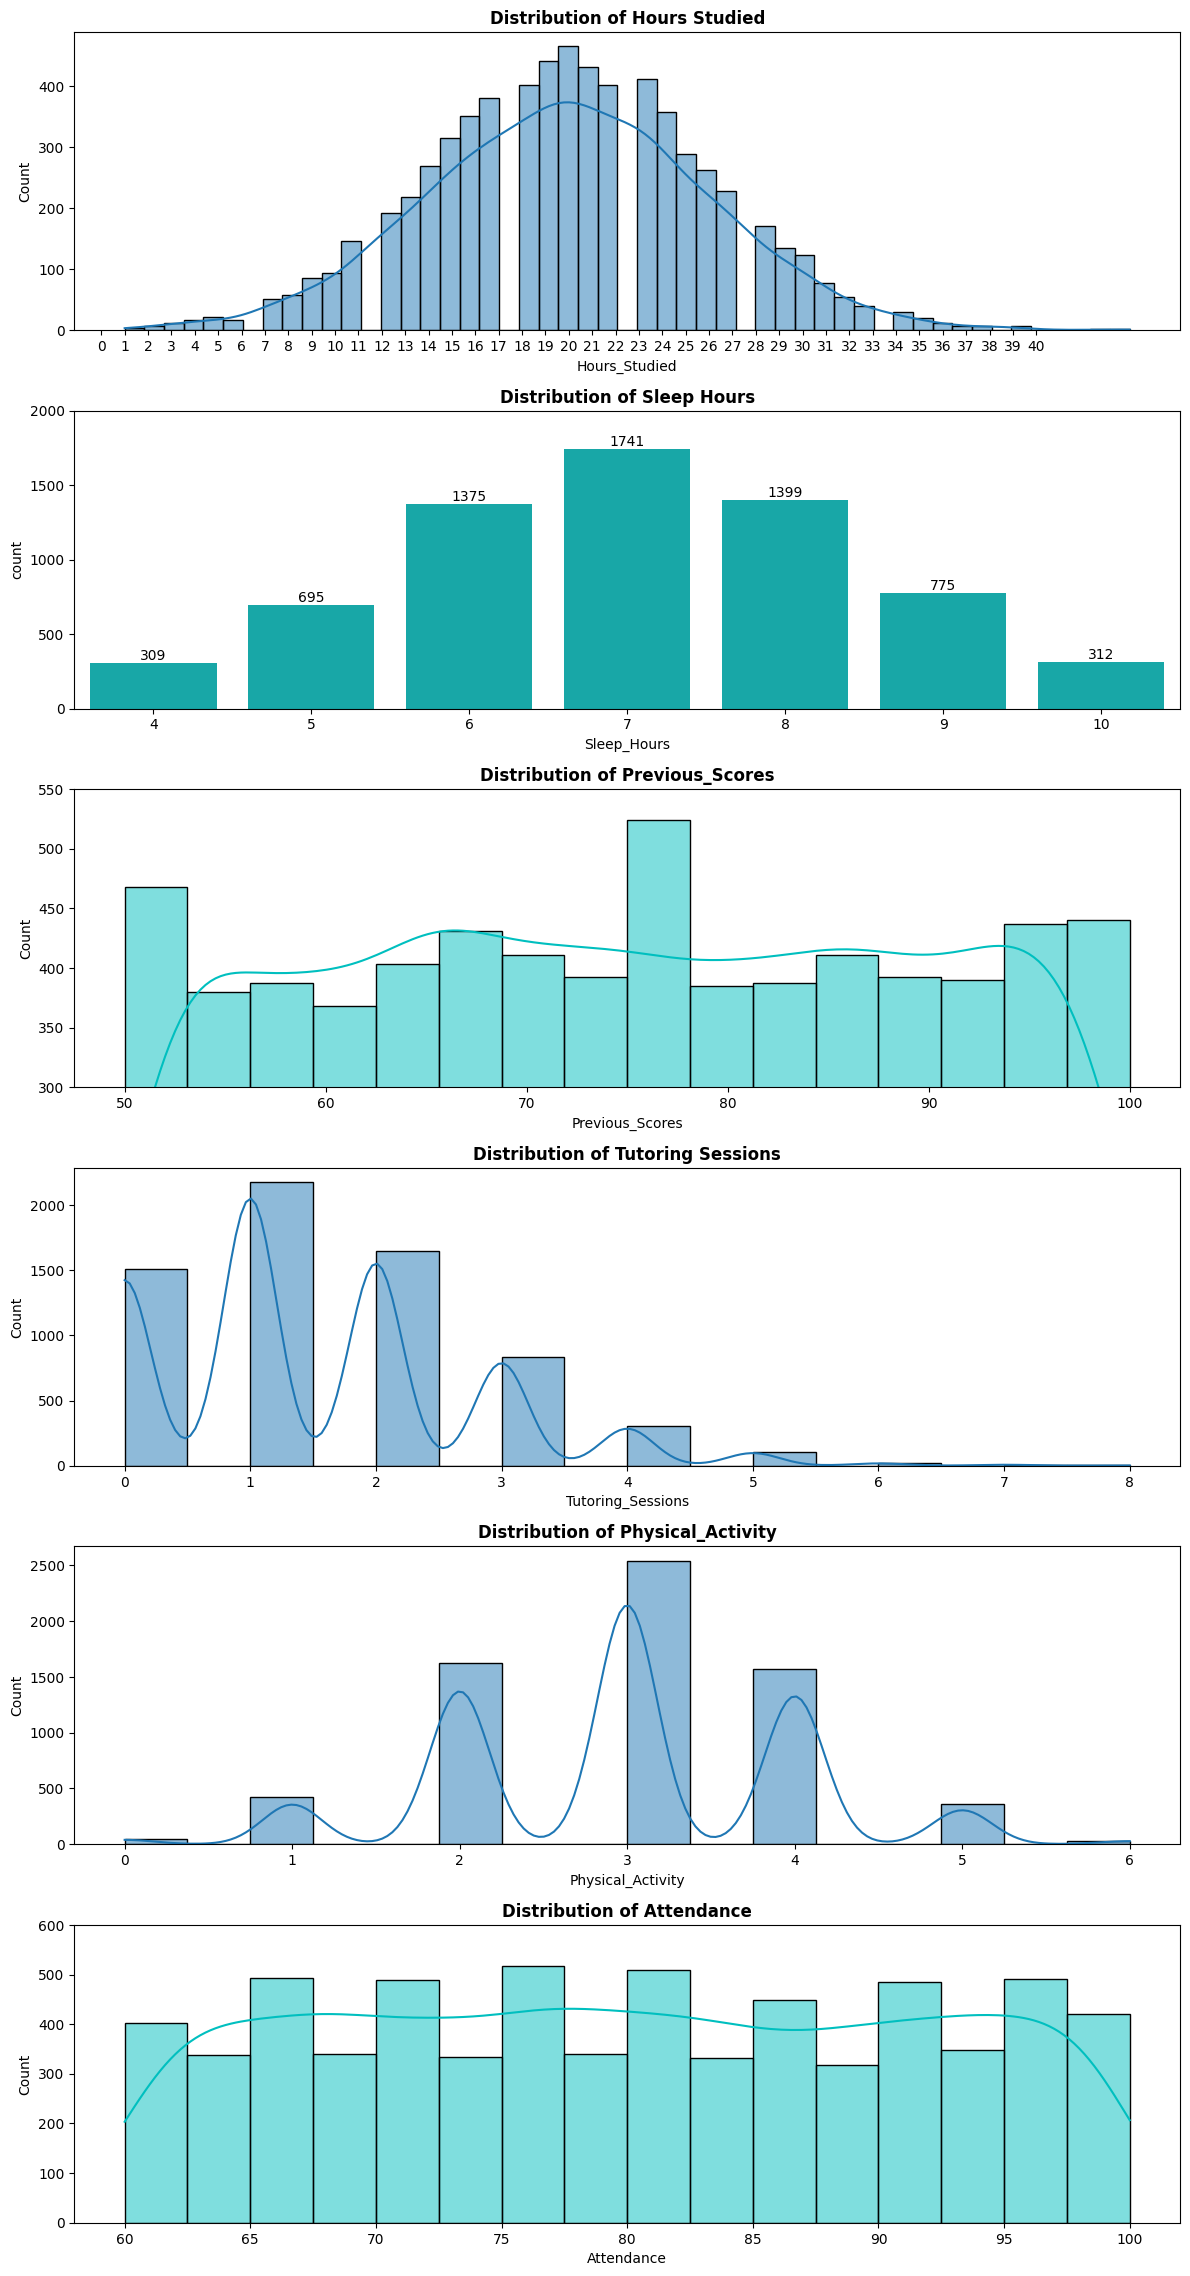

In [23]:
plt.figure(figsize = (12,30))

## Hours_Studied
plt.subplot(8,1,1)
sns.histplot(data = data,x= 'Hours_Studied', kde = True)
plt.title("Distribution of Hours Studied", weight ='bold')
plt.xticks(range(0,41,1))


## Sleep_Hours
plt.subplot(8,1,2)
ax = sns.countplot(data = data,x= 'Sleep_Hours',color = 'c')

## Data Labels
for container in ax.containers:
    ax.bar_label(container)

plt.title("Distribution of Sleep Hours", weight ='bold')
plt.yticks(range(0,2001,500))

## Previous_Scores
plt.subplot(8,1,3)
sns.histplot(data = data,x= 'Previous_Scores',color = 'c', kde = True, bins = 16)
plt.title("Distribution of Previous_Scores", weight ='bold')
plt.yticks(range(0,551,50))
plt.ylim([300,550])


## Tutoring_Sessions
plt.subplot(8,1,4)
sns.histplot(data = data,x= 'Tutoring_Sessions', kde = True, bins = 16)
plt.title("Distribution of Tutoring Sessions", weight ='bold')

## Physical_Activity
plt.subplot(8,1,5)
sns.histplot(data = data,x= 'Physical_Activity', kde = True, bins = 16)
plt.title("Distribution of Physical_Activity", weight ='bold')

## Attendance
plt.subplot(8,1,6)
sns.histplot(data = data,x= 'Attendance',color = 'c', kde = True, bins = 16)
plt.title("Distribution of Attendance", weight ='bold')
plt.yticks(range(0,601,100))

plt.tight_layout()
plt.show()

### One Hot Encoding

In [24]:
# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['Distance_from_Home', 'Parental_Involvement', 
                                             'Access_to_Resources', 'Extracurricular_Activities', 
                                             'Motivation_Level', 'Internet_Access', 
                                             'Family_Income', 'Teacher_Quality', 'School_Type', 
                                             'Peer_Influence', 'Learning_Disabilities', 
                                             'Parental_Education_Level','Gender'])

# Display the first few rows of the encoded data 
data_encoded.head()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Score Improvement (%),Distance_from_Home_Far,Distance_from_Home_Moderate,...,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Gender_Female,Gender_Male
0,23,84,7,73,0,3,67,-8.219178,False,False,...,False,False,True,True,False,False,True,False,False,True
1,19,64,8,59,2,4,61,3.389831,False,True,...,True,False,False,True,False,True,False,False,True,False
2,24,98,7,91,2,4,74,-18.681319,False,False,...,False,True,False,True,False,False,False,True,False,True
3,29,89,8,98,1,4,71,-27.551020,False,True,...,True,False,False,True,False,False,True,False,False,True
4,19,92,6,65,3,4,70,7.692308,False,False,...,False,True,False,True,False,True,False,False,True,False


## Student Performance

### __What  is the average exam score, and how is the performance distributed across students?__

In [25]:
Average_Exam_Score = data_encoded['Exam_Score'].mean()
print(f'Average_Exam_Score: {Average_Exam_Score}')

Average_Exam_Score: 67.23054798667877


### __Are there any patterns or trends in overall performance? Are scores normally distributed, or do we observe skewness?__

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


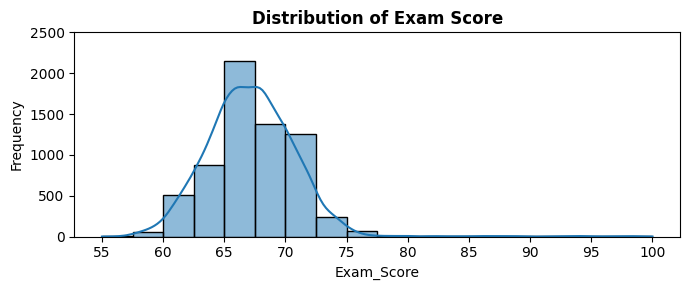

In [26]:
## Exam_Score
plt.figure(figsize=(7,3))
sns.histplot(data = data_encoded,x= 'Exam_Score', kde = True,binwidth=2.5)

plt.title("Distribution of Exam Score", weight ='bold')
plt.xticks(range(55,101,5))
plt.yticks(range(0,3000,500))
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The distribution is __positively skewed__ (right-skewed), which indicates that a smaller proportion of students are performing exceptionally well (scoring above 80), while most students' scores fall in the __60-75__ range.

The Peak of the distribution is between 65-70 range.

<Figure size 800x600 with 0 Axes>

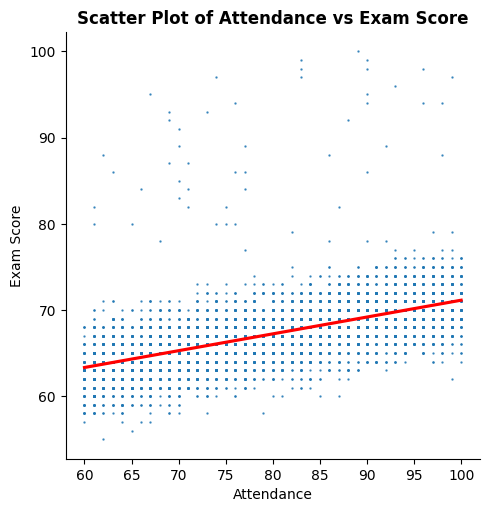

<Figure size 800x600 with 0 Axes>

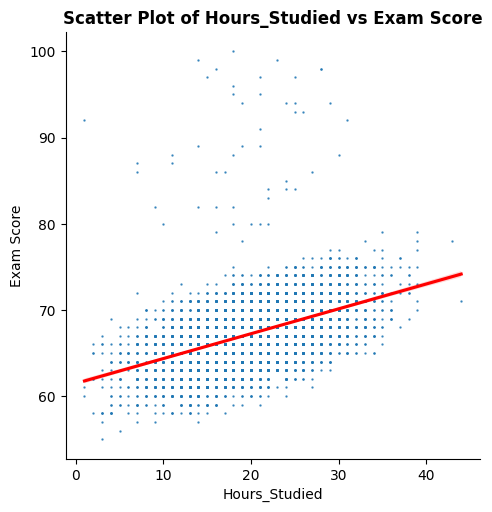

<Figure size 800x600 with 0 Axes>

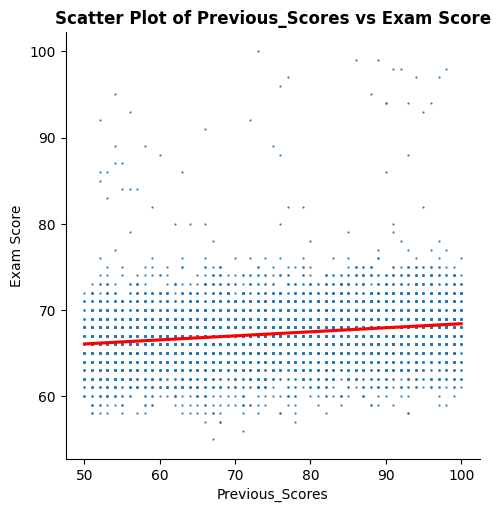

<Figure size 800x600 with 0 Axes>

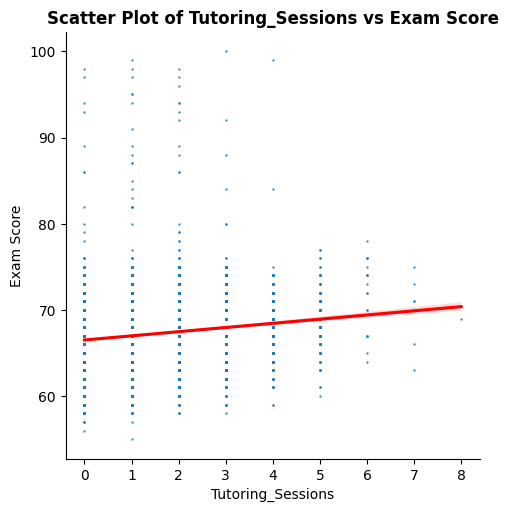

<Figure size 800x600 with 0 Axes>

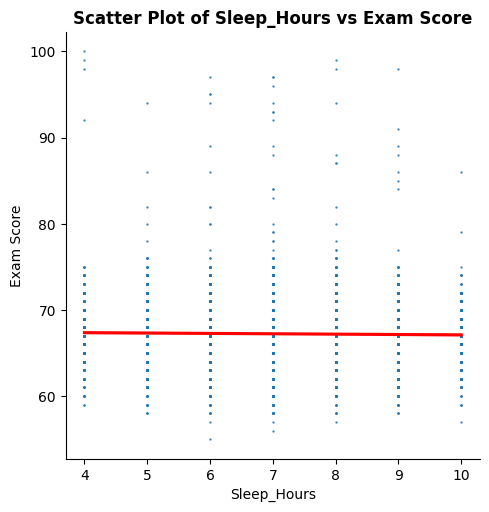

<Figure size 800x600 with 0 Axes>

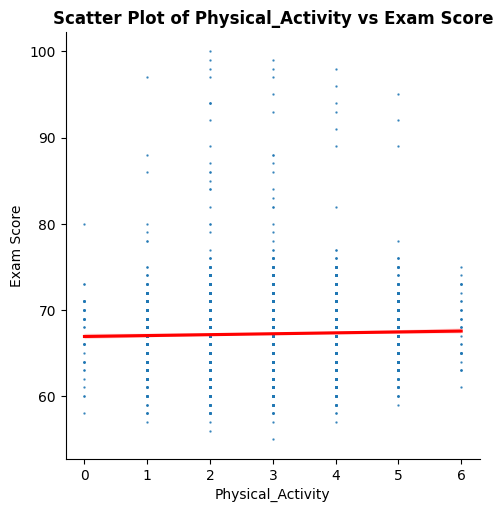

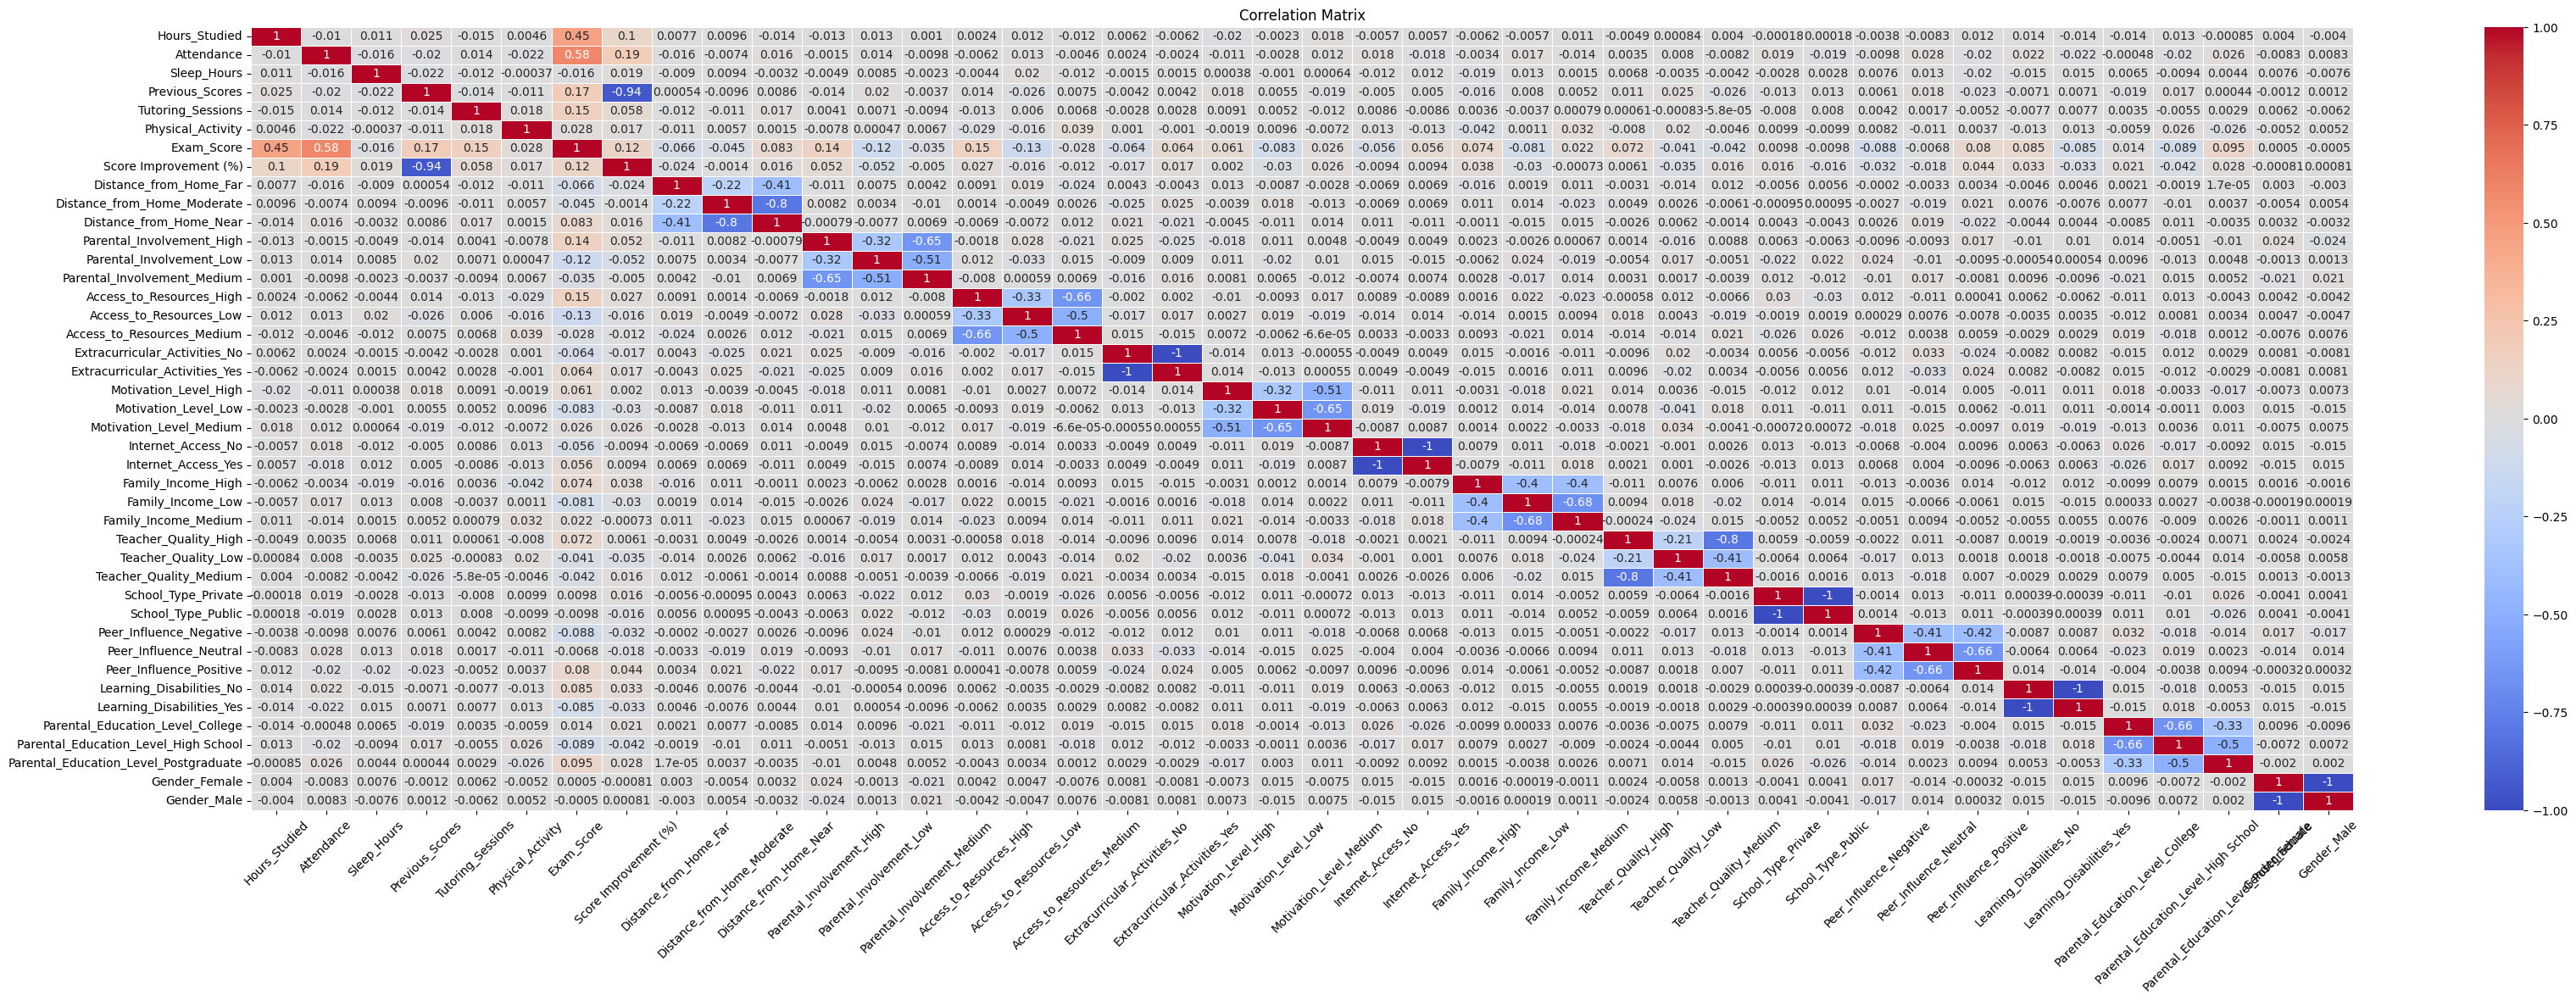

In [27]:
# Scatter Plots for significant correlations
variables_of_interest = ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions','Sleep_Hours','Physical_Activity']

for var in variables_of_interest:
    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var, y='Exam_Score',scatter_kws ={"s":0.5}, line_kws = {'color':'red'})
    plt.title(f'Scatter Plot of {var} vs Exam Score', weight = "bold")
    plt.xlabel(var)
    plt.ylabel('Exam Score')
    plt.show()

# Correlation Matrix
plt.figure(figsize = (40,12))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation = 45, fontsize = 10)

plt.show()

In [28]:
# The correlation matrix
correlation_matrix = data_encoded.corr()
exam_score_correlation_encoded = correlation_matrix['Exam_Score'].sort_values(ascending=False)
print("The correlation values with Exam_Score")
print("                                     ")
print(exam_score_correlation_encoded)

The correlation values with Exam_Score
                                     
Exam_Score                               1.000000
Attendance                               0.582458
Hours_Studied                            0.446514
Previous_Scores                          0.174461
Tutoring_Sessions                        0.153754
Access_to_Resources_High                 0.145460
Parental_Involvement_High                0.142050
Score Improvement (%)                    0.116595
Parental_Education_Level_Postgraduate    0.094961
Learning_Disabilities_No                 0.085103
Distance_from_Home_Near                  0.083020
Peer_Influence_Positive                  0.080072
Family_Income_High                       0.073796
Teacher_Quality_High                     0.071713
Extracurricular_Activities_Yes           0.063667
Motivation_Level_High                    0.061176
Internet_Access_Yes                      0.056447
Physical_Activity                        0.027943
Motivation_Level_Medium

## 1.    What factors strongly influence student performance?


-  __Attendance (0.582):__ The most strongly correlated factor, indicating that regular attendance significantly impacts performance.
-  __Hours_Studied (0.446):__ More study hours are positively associated with better scores.
- __Previous Scores (0.174):__ Past academic performance plays a role in predicting future exam outcomes.

## 2.Impact of tutoring sessions?

- __Tutoring Sessions (0.154):__ Tutoring has a positive correlation with exam performance, indicating that students with more tutoring sessions tend to score higher.

## 3.  How does access to resources affect student performance?

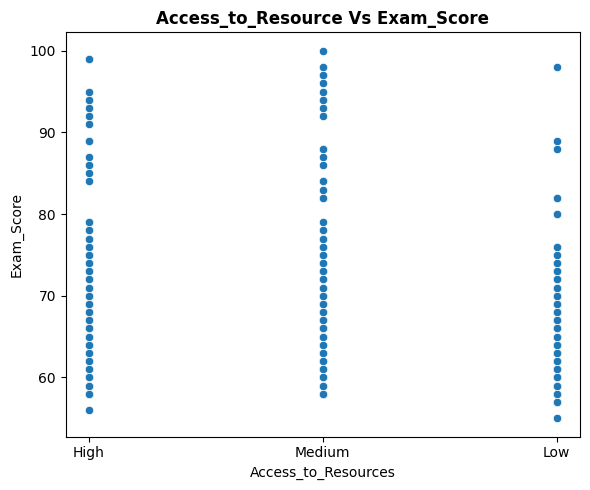

In [29]:
plt.figure(figsize = (6,5))
sns.scatterplot(data = data, x= 'Access_to_Resources', y = "Exam_Score")
plt.title('Access_to_Resource Vs Exam_Score', weight = 'bold')

plt.tight_layout()
plt.show()

- __Access to Resources (High) (0.145):__ Access to educational resources has a moderate positive impact on scores.
- __Access to Resources (Low) (-0.132):__ Lack of access negatively impacts performance.

## 4. Does parental involvement impact performance?

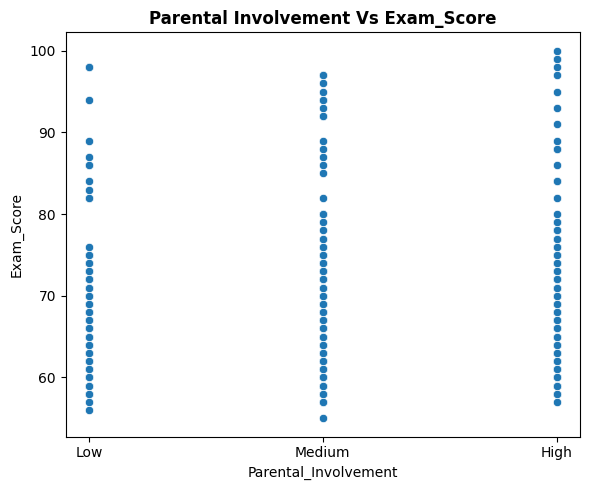

In [30]:
plt.figure(figsize = (6,5))
sns.scatterplot(data = data, x= 'Parental_Involvement', y = "Exam_Score")
plt.title('Parental Involvement Vs Exam_Score', weight = 'bold')

plt.tight_layout()
plt.show()

- __Parental Involvement (High) (0.142):__ High involvement has a modest positive correlation with exam performance.
- __Parental Involvement (Low) (-0.116):__ Low involvement negatively affects performance.

## 5. Does distance from home impact student performance?

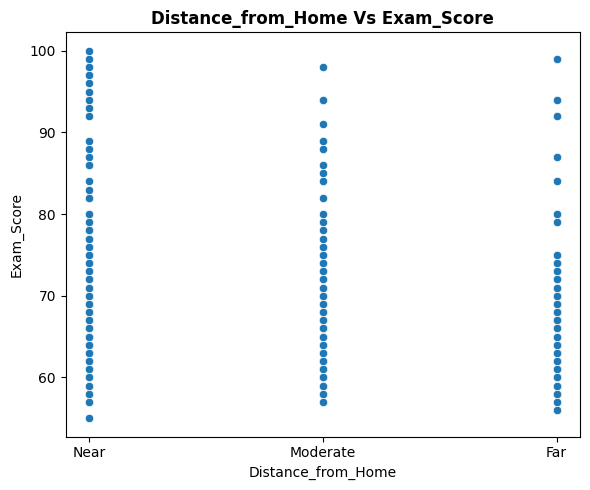

In [31]:
plt.figure(figsize = (6,5))
sns.scatterplot(data = data, x= 'Distance_from_Home', y = "Exam_Score")
plt.title('Distance_from_Home Vs Exam_Score', weight = 'bold')

plt.tight_layout()
plt.show()

- __Distance from Home (Near) (0.083):__ Students living closer to school perform slightly better.
- __Distance from Home (Far) (-0.066):__ Students living farther away perform slightly worse.

## 6.  Impact of socioeconomic factors like family income?


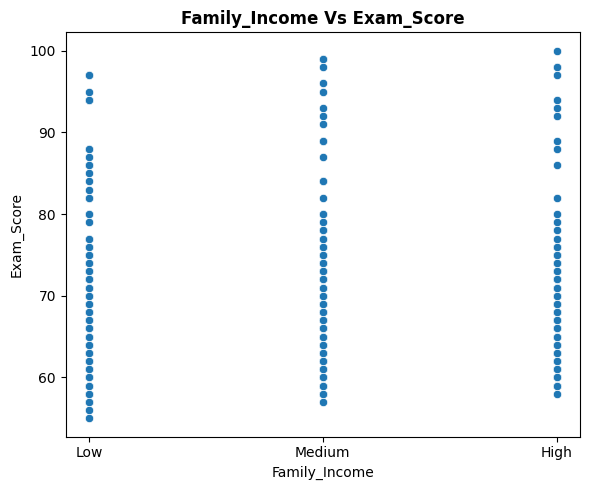

In [32]:
plt.figure(figsize = (6,5))
sns.scatterplot(data = data, x= 'Family_Income', y = "Exam_Score")
plt.title('Family_Income Vs Exam_Score', weight = 'bold')

plt.tight_layout()
plt.show()

- __Family Income (High) (0.074):__ Higher income is positively but weakly correlated with better scores.
- __Family Income (Low) (-0.081):__ Lower family income is weakly negatively correlated with exam performance.

## 7. How does teacher quality affect exam performance?

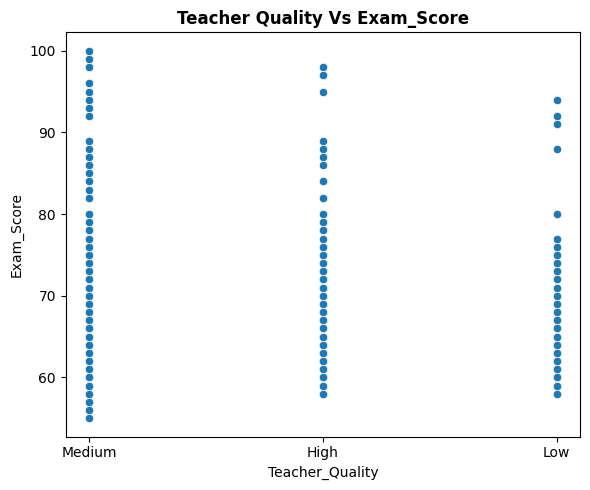

In [33]:
plt.figure(figsize = (6,5))
sns.scatterplot(data = data, x= 'Teacher_Quality', y = "Exam_Score")
plt.title('Teacher Quality Vs Exam_Score', weight = 'bold')

plt.tight_layout()
plt.show()

- __Teacher Quality (High) (0.072):__ High-quality teaching shows a slight positive correlation with scores.
- __Teacher Quality (Low and Medium)__ have negative correlations, suggesting that lower teacher quality slightly harms performance.

## 8.  Impact of extracurricular activities?

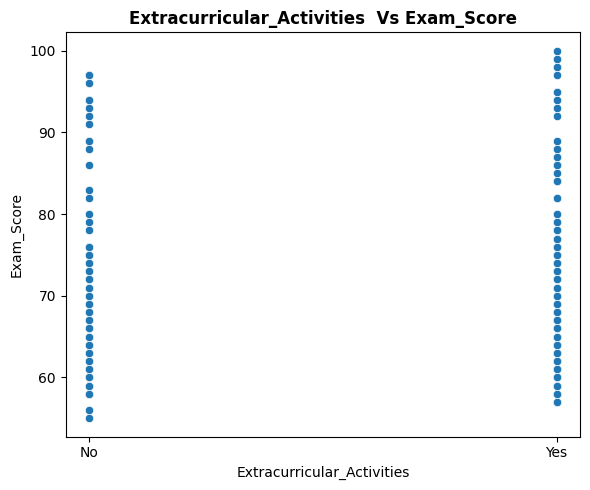

In [34]:
plt.figure(figsize = (6,5))
sns.scatterplot(data = data, x= 'Extracurricular_Activities', y = "Exam_Score")
plt.title('Extracurricular_Activities  Vs Exam_Score', weight = 'bold')

plt.tight_layout()
plt.show()

- __Extracurricular Activities (Yes) (0.064):__ Positive, but weak correlation with performance.
- __Extracurricular Activities (No) (-0.064):__ Slight negative impact on exam scores when not participating in activities.

## 9. Does motivation level impact student performance?


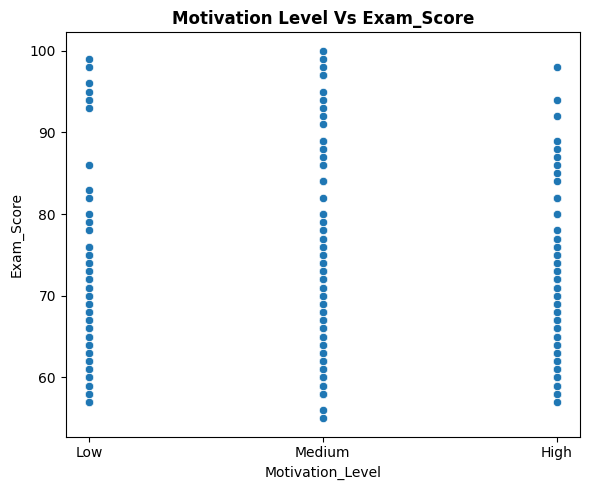

In [35]:
plt.figure(figsize = (6,5))
sns.scatterplot(data = data, x= 'Motivation_Level', y = "Exam_Score")
plt.title('Motivation Level Vs Exam_Score', weight = 'bold')

plt.tight_layout()
plt.show()

-  __Motivation Level (High) (0.061):__ Higher motivation correlates positively but weakly with exam scores.
- __Motivation Level (Low) (-0.083):__ Low motivation correlates negatively with performance.

## 10. How does physical activity and sleep affect scores?

- __Physical Activity (0.028):__ Minimal positive correlation with scores.
- __Sleep Hours (-0.016):__ Negligible negative impact, indicating that within this data, sleep doesn't show strong relevance to performance.

## 11. Does gender impact exam scores?

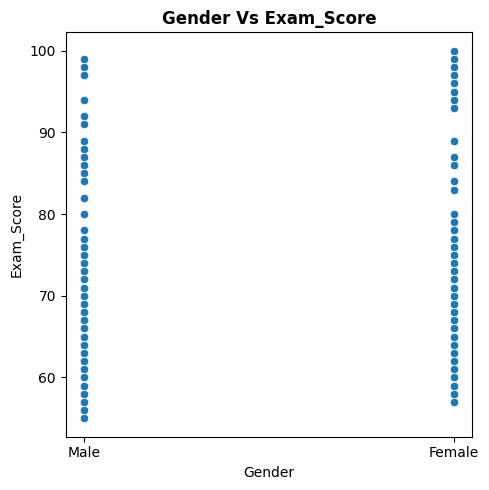

In [36]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = data, x= 'Gender', y = "Exam_Score")
plt.title('Gender Vs Exam_Score', weight = 'bold')

plt.tight_layout()
plt.show()

##### - __Gender (Female vs Male):__ Essentially no difference in performance between male and female students (correlations near zero).

## 12. Impact of Parental Education Level?


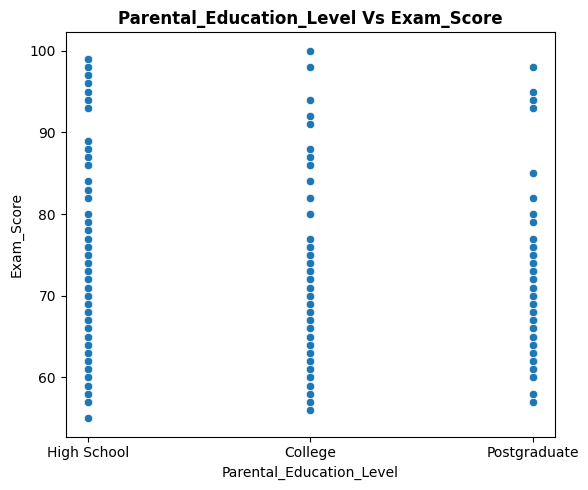

In [37]:
plt.figure(figsize = (6,5))
sns.scatterplot(data = data, x= 'Parental_Education_Level', y = "Exam_Score")
plt.title('Parental_Education_Level Vs Exam_Score', weight = 'bold')

plt.tight_layout()
plt.show()

- __Postgraduate (0.094961):__ Students whose parents have postgraduates degree perform better.
- __College (0.014455):__ Students whose parents with a college education has a slight positive impact, but less so than having a postgraduate degree.
- __High School(-0.088879):__ Students whose parents have only a high school education perform worse compared to those with parents who have higher education levels.

## 13. Impact of Learning Disabilities?


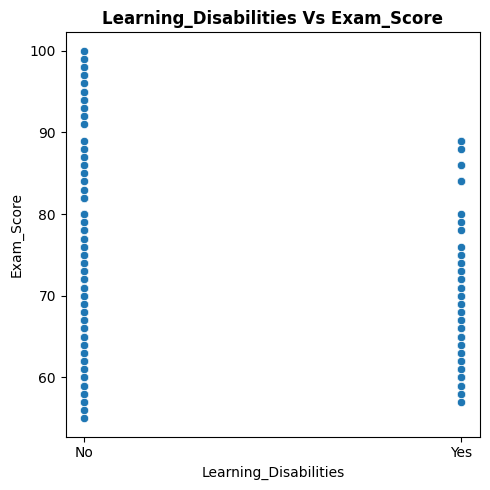

In [38]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = data, x= 'Learning_Disabilities', y = "Exam_Score")
plt.title('Learning_Disabilities Vs Exam_Score', weight = 'bold')

plt.tight_layout()
plt.show()

- __Learning_Disabilities_No (0.085103):__ Students  tend to have slightly higher exam scores, but the relationship is very weak.
- __Learning_Disabilities_Yes (-0.085103):__  Students  tend to have slightly lower exam scores, but again, the relationship is quite weak.

## 14. Peer Influence

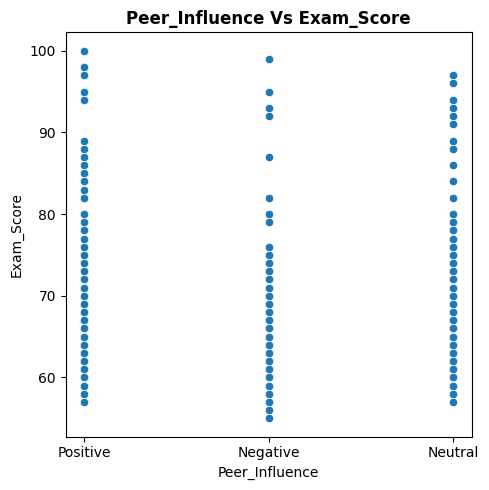

In [39]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = data, x= 'Peer_Influence', y = "Exam_Score")
plt.title('Peer_Influence Vs Exam_Score', weight = 'bold')

plt.tight_layout()
plt.show()

- __Positive Influence:__ Students with positive peer influence tend to have higher exam scores. 
- __Negative Influence:__ Students with negative peer influence seem to have a wider range of scores, including some lower scores. 
- __Neutral Influence:__ The scores for students with neutral peer influence are spread out, indicating that neutral peer interactions might not have a significant impact on exam performance.

## 15. Impact of Internet Access

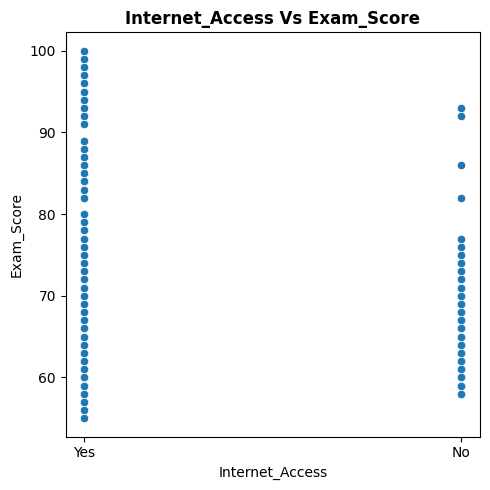

In [40]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = data, x= 'Internet_Access', y = "Exam_Score")
plt.title('Internet_Access Vs Exam_Score', weight = 'bold')

plt.tight_layout()
plt.show()

- The presence of internet access appears to have a small but positive effect on exam scores. 
- While the correlations are weak, they consistently suggest that internet access may contribute to better academic performance.

## 16. School Type

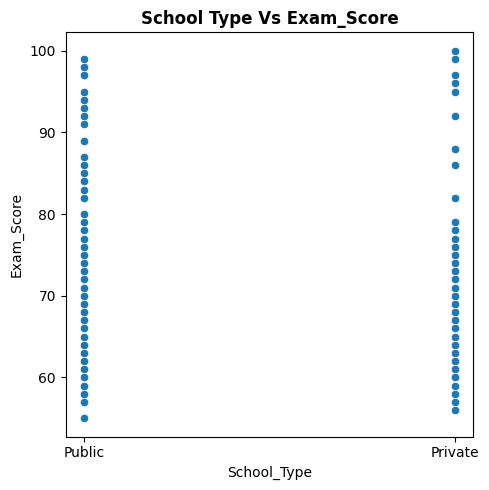

In [41]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = data, x= 'School_Type', y = "Exam_Score")
plt.title('School Type Vs Exam_Score', weight = 'bold')

plt.tight_layout()
plt.show()

- The correlation values indicate that the type of school (private or public) has a very minimal impact on exam scores. 
- The scores are distributed similarly across both school types, as seen in the scatter plot.

## Score Improvement

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Score Improvement')

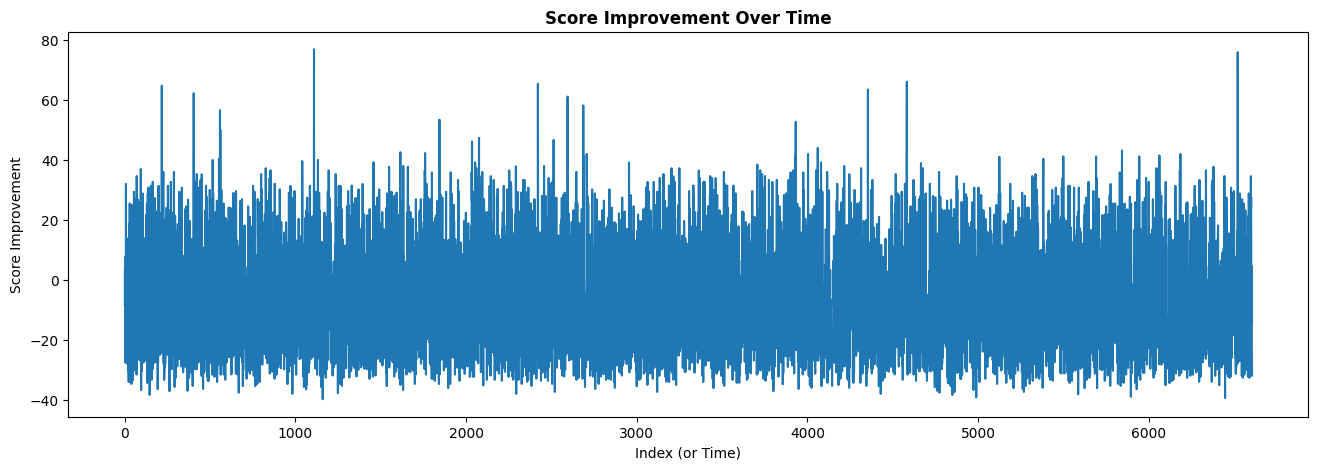

In [42]:
## Score Improvement

plt.figure(figsize = (16,5))
sns.lineplot(data=data, x=data.index, y='Score Improvement (%)')
plt.title('Score Improvement Over Time', weight='bold')
plt.xlabel('Index (or Time)')
plt.ylabel('Score Improvement')


In [43]:
average_score_improvement = data['Score Improvement (%)'].mean()

print(f'Average Improvement: {average_score_improvement}')

Average Improvement: -7.086596374777596


In [44]:
improvement_summary = data['Score Improvement (%)'].describe()
improvement_summary

count    6606.000000
mean       -7.086596
std        18.576173
min       -39.795918
25%       -22.580645
50%       -10.526316
75%         6.324405
max        76.923077
Name: Score Improvement (%), dtype: float64

- The mean score improvement is __negative__, indicating that, on average, students experienced a decrease in scores. This could be a sign of an issue in the intervention or factors affecting performance.

## Summary

- __Attendance__ and __hours studied__ are the most influential factors affecting exam scores.
- __Parental involvement, access to resources, and previous scores__ also have notable effects.
- __Motivation__, while important, shows weaker correlations compared to attendance and study hours.
- Factors such as __gender__ and __school type__ do not significantly impact exam performance.